# 特征工程全部数据-分类
根据前 7 天是否付费分为 2 部分

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_raw = '../../data/new/train=all/'
path_train = '../../data/new/train=all-class/'
path_test = '../../data/new/test/'
time_col = 'register_time'

target = 'prediction_pay_price'
user_id = 'user_id'

## 指定读取数据类型，节省内存

In [3]:
col_int32 = ['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       'magic_add_value', 'magic_reduce_value', 'infantry_add_value',
       'infantry_reduce_value', 'cavalry_add_value', 'cavalry_reduce_value',
       'shaman_add_value', 'shaman_reduce_value', 'wound_infantry_add_value',
       'wound_infantry_reduce_value', 'wound_cavalry_add_value',
       'wound_cavalry_reduce_value', 'wound_shaman_add_value',
       'wound_shaman_reduce_value', 'general_acceleration_add_value',
       'general_acceleration_reduce_value', 'building_acceleration_add_value',
       'building_acceleration_reduce_value', 'reaserch_acceleration_add_value',
       'reaserch_acceleration_reduce_value', 'training_acceleration_add_value',
       'training_acceleration_reduce_value', 'treatment_acceleraion_add_value',
       'treatment_acceleration_reduce_value', 'bd_training_hut_level',
       'bd_healing_lodge_level', 'bd_stronghold_level',
       'bd_outpost_portal_level', 'bd_barrack_level',
       'bd_healing_spring_level', 'bd_dolmen_level', 'bd_guest_cavern_level',
       'bd_warehouse_level', 'bd_watchtower_level', 'bd_magic_coin_tree_level',
       'bd_hall_of_war_level', 'bd_market_level', 'bd_hero_gacha_level',
       'bd_hero_strengthen_level', 'bd_hero_pve_level', 'sr_scout_level', 
       'sr_training_speed_level', 'sr_infantry_tier_2_level',
       'sr_cavalry_tier_2_level', 'sr_shaman_tier_2_level',
       'sr_infantry_atk_level', 'sr_cavalry_atk_level', 'sr_shaman_atk_level',
       'sr_infantry_tier_3_level', 'sr_cavalry_tier_3_level',
       'sr_shaman_tier_3_level', 'sr_troop_defense_level',
       'sr_infantry_def_level', 'sr_cavalry_def_level', 'sr_shaman_def_level',
       'sr_infantry_hp_level', 'sr_cavalry_hp_level', 'sr_shaman_hp_level',
       'sr_infantry_tier_4_level', 'sr_cavalry_tier_4_level',
       'sr_shaman_tier_4_level', 'sr_troop_attack_level',
       'sr_construction_speed_level', 'sr_hide_storage_level',
       'sr_troop_consumption_level', 'sr_rss_a_prod_levell',
       'sr_rss_b_prod_level', 'sr_rss_c_prod_level', 'sr_rss_d_prod_level',
       'sr_rss_a_gather_level', 'sr_rss_b_gather_level',
       'sr_rss_c_gather_level', 'sr_rss_d_gather_level', 'sr_troop_load_level',
       'sr_rss_e_gather_level', 'sr_rss_e_prod_level',
       'sr_outpost_durability_level', 'sr_outpost_tier_2_level',
       'sr_healing_space_level', 'sr_gathering_hunter_buff_level',
       'sr_healing_speed_level', 'sr_outpost_tier_3_level',
       'sr_alliance_march_speed_level', 'sr_pvp_march_speed_level',
       'sr_gathering_march_speed_level', 'sr_outpost_tier_4_level',
       'sr_guest_troop_capacity_level', 'sr_march_size_level',
       'sr_rss_help_bonus_level', 'pvp_battle_count', 'pvp_lanch_count',
       'pvp_win_count', 'pve_battle_count', 'pve_lanch_count', 'pve_win_count',
       'pay_count']
col_float32 = ['avg_online_minutes', 'pay_price']

In [4]:
# 指定读取数据类型，节省内存
dtype_test = {}
for col in col_int32:
    dtype_test[col] = np.int32
for col in col_float32:
    dtype_test[col] = np.float32
# dtype_test

In [5]:
dtype_train = dtype_test.copy()
dtype_train[target] = np.float32
# dtype_train

## 读取数据

In [6]:
train = pd.read_csv(path_raw + 'train=fe.csv', dtype=dtype_train)
train.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [7]:
train.describe()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,1.176103e+02,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.016729e+01,5.347958e-01,5.770699e-02,1.793456e+00
std,9.399393e+05,1.128819e+01,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.869698e+01,2.263181e+01,7.090886e-01,8.844339e+01
min,1.000000e+00,9.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,1.180000e+02,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.270000e+02,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.360000e+02,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 951.4 MB


In [8]:
test = pd.read_csv(path_test + 'tap_fun_test-fe.csv', dtype=dtype_train)
test.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,94,166415,138362,0,0,0,0,258522,90142,...,0,0,0,0,1,1,1,8.000000,0.0,0
1,14934,94,10000,600,0,0,0,0,10000,400,...,0,0,0,0,0,0,0,0.166667,0.0,0
2,14935,94,10000,3700,0,0,0,0,10000,2000,...,0,0,0,0,0,0,0,17.000000,0.0,0
3,14936,94,210000,0,200000,0,200000,0,610000,0,...,0,0,0,0,0,0,0,1.666667,0.0,0
4,14937,94,11500,3700,0,0,0,0,11000,2000,...,0,0,0,0,0,0,0,0.333333,0.0,0


In [9]:
test.describe()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
count,8.289340e+05,828934.000000,8.289340e+05,8.289340e+05,8.289340e+05,8.289340e+05,8.289340e+05,8.289340e+05,8.289340e+05,8.289340e+05,...,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000,828934.000000
mean,1.811513e+06,88.683147,6.036094e+05,4.954049e+05,2.664795e+05,1.928065e+05,1.145129e+05,4.900608e+04,7.858710e+05,4.769075e+05,...,0.000004,2.465479,1.258245,1.082348,4.047161,4.033595,3.664157,11.730618,0.671848,0.073584
std,8.229500e+05,4.498726,5.956937e+06,4.618960e+06,5.646053e+06,4.234870e+06,2.644724e+06,2.143394e+06,6.811104e+06,4.154989e+06,...,0.001902,12.138123,9.286738,8.553828,15.531760,15.493540,14.451119,42.817371,28.482704,0.813628
min,1.493300e+04,80.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.286373e+06,85.000000,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
50%,2.012872e+06,89.000000,5.506600e+04,1.549950e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.150500e+04,9.656000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000
75%,2.481669e+06,93.000000,1.833378e+05,9.765375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.751968e+05,6.532150e+04,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000
max,3.176543e+06,96.000000,1.347899e+09,1.042377e+09,1.329986e+09,1.019128e+09,5.562941e+08,5.537311e+08,1.492037e+09,1.041435e+09,...,1.000000,2351.000000,2288.000000,1275.000000,315.000000,315.000000,304.000000,1605.833374,14495.219727,178.000000


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 108 entries, user_id to pay_count
dtypes: float32(2), int32(106)
memory usage: 341.5 MB


## 根据前 7 天是否付费分为 2 部分

In [9]:
def get_only_pay(df, pay_col):
    ''' 只保留付费记录 pay_col 付费字段'''
    df_pay = df.loc[df[pay_col] > 0]
    df_nopay = df.loc[df[pay_col] == 0]
    return df_pay, df_nopay

In [10]:
# 按 7 天付费记录拆分 
train_pay, train_nopay = get_only_pay(train, 'pay_price')
print(train.shape)
print(train_pay.shape)
print(train_nopay.shape)
print(train_nopay.shape[0]+train_pay.shape[0])

(2288007, 109)
(41439, 109)
(2246568, 109)
2288007


In [15]:
# 只保留付费记录
train_pay.to_csv(path_train + 'train-7pay.csv', index=False)
# 不付费的记录 
train_nopay.to_csv(path_train + 'train-7nopay.csv', index=False)
train_nopay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246568 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 951.3 MB


In [14]:
# 按 7 天付费记录拆分 
test_pay, test_nopay = get_only_pay(test, 'pay_price')
print(test.shape)
print(test_pay.shape)
print(test_nopay.shape)
print(test_nopay.shape[0]+test_pay.shape[0])

(828934, 108)
(19549, 108)
(809385, 108)
828934


In [16]:
# 只保留付费记录
test_pay.to_csv(path_test + 'test-7pay.csv', index=False)
# 不付费的记录 
test_nopay.to_csv(path_test + 'test-7nopay.csv', index=False)
test_nopay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809385 entries, 0 to 828933
Columns: 108 entries, user_id to pay_count
dtypes: float32(2), int32(106)
memory usage: 339.6 MB


## 根据前 45 天是否付费，设置训练集

In [6]:
train_pay = pd.read_csv(path_train + 'train-7pay.csv', dtype=dtype_train)
train_pay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1617,136,30000,97200,20000,0,0,0,160500,80392,...,0,0,0,0,0,0,44.666668,0.99,1,0.99
1,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.97,3,4.96
2,1639,136,249050,173248,70841,117012,55000,0,206366,82205,...,0,0,0,0,0,0,109.333336,12.97,3,12.97
3,1678,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,127.833336,0.99,1,0.99
4,1711,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,203.166672,0.99,1,0.99


In [7]:
train_nopay = pd.read_csv(path_train + 'train-7nopay.csv', dtype=dtype_train)
train_nopay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


Text(0.5,1,'Distribution of prediction_pay_price')

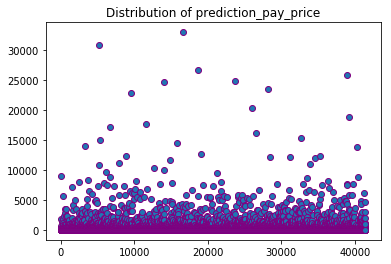

In [20]:
# 离群点检测：单个特征散点图
plt.scatter(range(train_pay.shape[0]), train_pay[target].values, edgecolors='purple')
plt.title('Distribution of prediction_pay_price')
# 超过 25000 可以认为是异常点

In [9]:
def get_again_pay(df, neddChange):
    ''' 只保留付费记录 pay_col 付费字段'''
    df_pay = df.loc[df[target] > df['pay_price']]
    df_nopay = df.loc[df[target] == df['pay_price']]
    if neddChange:
        df_pay[target] = 1
        df_pay[target] = df_pay[target].astype(np.int32)
        df_nopay[target] = 0
        df_nopay[target] = df_nopay[target].astype(np.int32)
    return df_pay, df_nopay

In [10]:
# # 按 45 天付费记录拆分 
# train_45pay, train_45nopay = get_again_pay(train_pay, True)
train_45pay, train_45nopay = get_again_pay(train_pay, False)
print(train_pay.shape)
print(train_45pay.shape)
print(train_45nopay.shape)
print(train_45nopay.shape[0]+train_45pay.shape[0])

(41439, 109)
(11309, 109)
(30130, 109)
41439


In [12]:
train_45pay.to_csv(path_train + 'train_7pay_45pay.csv', index=False)
train_45pay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
1,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.970000,3,4.960000
5,1747,136,5475019,7377434,4926938,4552369,2507392,1772039,6040642,4213417,...,1,0,0,34,34,29,311.166656,156.880005,12,166.860001
8,1840,136,785351,1433248,202000,0,4000,0,816624,914306,...,2,0,1,2,2,2,76.833336,14.980000,2,19.969999
11,1973,136,55495770,12635052,54377104,12088437,23307952,7683341,64528810,9544950,...,2,2,2,16,16,15,143.166672,406.869995,13,8982.780273
15,2073,136,637524,1077362,487265,818650,296764,94500,798710,1172188,...,0,0,0,1,1,1,54.833332,6.970000,3,8.960000


In [13]:
train_45nopay.to_csv(path_train + 'train_7pay_45nopay.csv', index=False)
train_45nopay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1617,136,30000,97200,20000,0,0,0,160500,80392,...,0,0,0,0,0,0,44.666668,0.990000,1,0.990000
2,1639,136,249050,173248,70841,117012,55000,0,206366,82205,...,0,0,0,0,0,0,109.333336,12.970000,3,12.970000
3,1678,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,127.833336,0.990000,1,0.990000
4,1711,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,203.166672,0.990000,1,0.990000
6,1763,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13.833333,26.940001,6,26.940001


Text(0.5,1,'Distribution of prediction_pay_price')

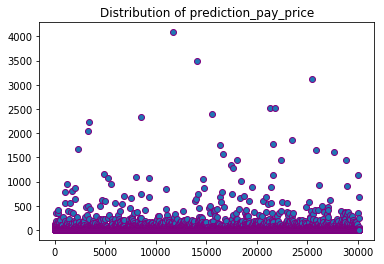

In [40]:
# 离群点检测：单个特征散点图
plt.scatter(range(train_45nopay.shape[0]), train_45nopay['pay_price'].values, edgecolors='purple')
plt.title('Distribution of prediction_pay_price')
# 超过 3000 可以认为是异常点

In [41]:
# 合并带有分类标记的
train_7pay_45 = pd.concat([train_45pay, train_45nopay])
train_7pay_45.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
40,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.970000,3,1
155,1747,136,5475019,7377434,4926938,4552369,2507392,1772039,6040642,4213417,...,1,0,0,34,34,29,311.166656,156.880005,12,1
248,1840,136,785351,1433248,202000,0,4000,0,816624,914306,...,2,0,1,2,2,2,76.833336,14.980000,2,1
381,1973,136,55495770,12635052,54377104,12088437,23307952,7683341,64528810,9544950,...,2,2,2,16,16,15,143.166672,406.869995,13,1
481,2073,136,637524,1077362,487265,818650,296764,94500,798710,1172188,...,0,0,0,1,1,1,54.833332,6.970000,3,1


In [42]:
train_7pay_45.to_csv(path_train + 'train_7pay_45.csv', index=False)
train_7pay_45.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41439 entries, 40 to 2287984
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(2), int32(107)
memory usage: 17.5 MB


In [14]:
# # 按 45 天付费记录拆分 
# train_45pay, train_45nopay = get_again_pay(train_nopay, True)
train_45pay, train_45nopay = get_again_pay(train_nopay, False)
print(train_nopay.shape)
print(train_45pay.shape)
print(train_45nopay.shape)
print(train_45nopay.shape[0]+train_45pay.shape[0])

(2246568, 109)
(4549, 109)
(2242019, 109)
2246568


In [15]:
train_45pay.to_csv(path_train + 'train_7nopay_45pay.csv', index=False)
train_45pay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
1450,3080,135,1838257,750275,1020000,0,500000,0,2655599,518017,...,0,0,0,2,2,2,55.000000,0.0,0,0.990000
1847,3486,135,125571,137444,0,0,0,0,383096,110757,...,0,0,0,2,2,2,10.333333,0.0,0,110.959999
1991,3634,135,3502148,3307656,2212034,2347160,299000,0,5568181,4987212,...,14,13,14,24,24,24,183.000000,0.0,0,0.990000
2201,3851,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,0.990000
2320,3970,135,1585745,1655823,581606,435280,246000,0,2620981,1601449,...,14,4,2,24,24,24,57.833332,0.0,0,0.990000


In [16]:
train_45nopay.to_csv(path_train + 'train_7nopay_45nopay.csv', index=False)
train_45nopay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [17]:
train_45nopay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242019 entries, 0 to 2246567
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 949.3 MB


In [44]:
# 合并带有分类标记的
train_7nopay_45 = pd.concat([train_45pay, train_45nopay])
train_7nopay_45.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
1488,3080,135,1838257,750275,1020000,0,500000,0,2655599,518017,...,0,0,0,2,2,2,55.000000,0.0,0,1
1894,3486,135,125571,137444,0,0,0,0,383096,110757,...,0,0,0,2,2,2,10.333333,0.0,0,1
2042,3634,135,3502148,3307656,2212034,2347160,299000,0,5568181,4987212,...,14,13,14,24,24,24,183.000000,0.0,0,1
2259,3851,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,1
2378,3970,135,1585745,1655823,581606,435280,246000,0,2620981,1601449,...,14,4,2,24,24,24,57.833332,0.0,0,1


In [45]:
train_7nopay_45.to_csv(path_train + 'train_7nopay_45.csv', index=False)
train_7nopay_45.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246568 entries, 1488 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(2), int32(107)
memory usage: 951.3 MB


## 拆分为 5 份，随机抽样: train_7pay_45

In [9]:
train_7pay_45 = pd.read_csv(path_train + 'train_7pay_45.csv', dtype=dtype_train)
train_7pay_45[target] = train_7pay_45[target].astype(np.int32)
train_7pay_45.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.970000,3,1
1,1747,136,5475019,7377434,4926938,4552369,2507392,1772039,6040642,4213417,...,1,0,0,34,34,29,311.166656,156.880005,12,1
2,1840,136,785351,1433248,202000,0,4000,0,816624,914306,...,2,0,1,2,2,2,76.833336,14.980000,2,1
3,1973,136,55495770,12635052,54377104,12088437,23307952,7683341,64528810,9544950,...,2,2,2,16,16,15,143.166672,406.869995,13,1
4,2073,136,637524,1077362,487265,818650,296764,94500,798710,1172188,...,0,0,0,1,1,1,54.833332,6.970000,3,1


In [6]:
def part_to_5(df, fname):
    # 先取出 0.2 剩余的 0.8 再平分为 0.4 再平分为 0.2 
    train_part2345, train_part1 = train_test_split(df, random_state=33, test_size=0.2)
    print('df.shape=%s train_part2345.shape=%s train_part1.shape=%s'
          %(df.shape, train_part2345.shape, train_part1.shape))
    train_part1.to_csv(path_train + '%s-1.csv' % fname, index=False)
    train_part1.info()
    
    train_part23, train_part45 = train_test_split(train_part2345, random_state=33, test_size=0.5)
    print('train_part2345.shape=%s train_part23.shape=%s train_part45.shape=%s'
          %(train_part2345.shape, train_part23.shape, train_part45.shape))

    train_part2, train_part3 = train_test_split(train_part23, random_state=33, test_size=0.5)
    print('train_part23.shape=%s train_part2.shape=%s train_part3.shape=%s'
          %(train_part23.shape, train_part2.shape, train_part3.shape))
    train_part2.to_csv(path_train + '%s-2.csv' % fname, index=False)
    train_part3.to_csv(path_train + '%s-3.csv' % fname, index=False)

    train_part4, train_part5 = train_test_split(train_part45, random_state=33, test_size=0.5)
    print('train_part45.shape=%s train_part4.shape=%s train_part5.shape=%s'
          %(train_part45.shape, train_part4.shape, train_part5.shape))
    train_part4.to_csv(path_train + '%s-4.csv' % fname, index=False)
    train_part5.to_csv(path_train + '%s-5.csv' % fname, index=False)

In [14]:
part_to_5(train_7pay_45, 'train_7pay_45')

df.shape=(41439, 109) train_part2345.shape=(33151, 109) train_part1.shape=(8288, 109)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288 entries, 1500 to 6314
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(2), int32(107)
memory usage: 3.5 MB
train_part2345.shape=(33151, 109) train_part23.shape=(16575, 109) train_part45.shape=(16576, 109)
train_part23.shape=(16575, 109) train_part2.shape=(8287, 109) train_part3.shape=(8288, 109)
train_part45.shape=(16576, 109) train_part4.shape=(8288, 109) train_part5.shape=(8288, 109)


In [16]:
train_7nopay_45 = pd.read_csv(path_train + 'train_7nopay_45.csv', dtype=dtype_train)
train_7nopay_45[target] = train_7nopay_45[target].astype(np.int32)
train_7nopay_45.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,3080,135,1838257,750275,1020000,0,500000,0,2655599,518017,...,0,0,0,2,2,2,55.000000,0.0,0,1
1,3486,135,125571,137444,0,0,0,0,383096,110757,...,0,0,0,2,2,2,10.333333,0.0,0,1
2,3634,135,3502148,3307656,2212034,2347160,299000,0,5568181,4987212,...,14,13,14,24,24,24,183.000000,0.0,0,1
3,3851,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,1
4,3970,135,1585745,1655823,581606,435280,246000,0,2620981,1601449,...,14,4,2,24,24,24,57.833332,0.0,0,1


In [17]:
part_to_5(train_7nopay_45, 'train_7nopay_45')

df.shape=(2246568, 109) train_part2345.shape=(1797254, 109) train_part1.shape=(449314, 109)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449314 entries, 1250647 to 769437
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(2), int32(107)
memory usage: 190.3 MB
train_part2345.shape=(1797254, 109) train_part23.shape=(898627, 109) train_part45.shape=(898627, 109)
train_part23.shape=(898627, 109) train_part2.shape=(449313, 109) train_part3.shape=(449314, 109)
train_part45.shape=(898627, 109) train_part4.shape=(449313, 109) train_part5.shape=(449314, 109)


## 拆分为 5 份，随机抽样: train_7pay_45pay

In [6]:
train_7pay_45pay = pd.read_csv(path_train + 'train_7pay_45pay.csv', dtype=dtype_train)
train_7pay_45pay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.970000,3,4.960000
1,1747,136,5475019,7377434,4926938,4552369,2507392,1772039,6040642,4213417,...,1,0,0,34,34,29,311.166656,156.880005,12,166.860001
2,1840,136,785351,1433248,202000,0,4000,0,816624,914306,...,2,0,1,2,2,2,76.833336,14.980000,2,19.969999
3,1973,136,55495770,12635052,54377104,12088437,23307952,7683341,64528810,9544950,...,2,2,2,16,16,15,143.166672,406.869995,13,8982.780273
4,2073,136,637524,1077362,487265,818650,296764,94500,798710,1172188,...,0,0,0,1,1,1,54.833332,6.970000,3,8.960000


In [7]:
train_7pay_45pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11309 entries, 0 to 11308
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 4.7 MB


In [9]:
part_to_5(train_7pay_45pay, 'train_7pay_45pay')

df.shape=(11309, 109) train_part2345.shape=(9047, 109) train_part1.shape=(2262, 109)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 8514 to 9062
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 980.8 KB
train_part2345.shape=(9047, 109) train_part23.shape=(4523, 109) train_part45.shape=(4524, 109)
train_part23.shape=(4523, 109) train_part2.shape=(2261, 109) train_part3.shape=(2262, 109)
train_part45.shape=(4524, 109) train_part4.shape=(2262, 109) train_part5.shape=(2262, 109)


## 拆分为 5 份，随机抽样: train-7pay.csv

In [7]:
train_7pay = pd.read_csv(path_train + 'train-7pay.csv', dtype=dtype_train)
train_7pay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1617,136,30000,97200,20000,0,0,0,160500,80392,...,0,0,0,0,0,0,44.666668,0.99,1,0.99
1,1632,136,1111744,1137687,491331,790208,77000,0,1457249,708483,...,1,1,1,6,6,6,199.333328,2.97,3,4.96
2,1639,136,249050,173248,70841,117012,55000,0,206366,82205,...,0,0,0,0,0,0,109.333336,12.97,3,12.97
3,1678,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,127.833336,0.99,1,0.99
4,1711,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,203.166672,0.99,1,0.99


In [8]:
train_7pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41439 entries, 0 to 41438
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 17.2 MB


In [9]:
part_to_5(train_7pay, 'train_7pay')

df.shape=(41439, 109) train_part2345.shape=(33151, 109) train_part1.shape=(8288, 109)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288 entries, 1500 to 6314
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 3.5 MB
train_part2345.shape=(33151, 109) train_part23.shape=(16575, 109) train_part45.shape=(16576, 109)
train_part23.shape=(16575, 109) train_part2.shape=(8287, 109) train_part3.shape=(8288, 109)
train_part45.shape=(16576, 109) train_part4.shape=(8288, 109) train_part5.shape=(8288, 109)


## 拆分为 5 份，随机抽样: train-7nopay

In [10]:
train_7nopay = pd.read_csv(path_train + 'train-7nopay.csv', dtype=dtype_train)
train_7nopay.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [11]:
train_7nopay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246568 entries, 0 to 2246567
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 934.1 MB


In [12]:
part_to_5(train_7nopay, 'train_7nopay')

df.shape=(2246568, 109) train_part2345.shape=(1797254, 109) train_part1.shape=(449314, 109)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449314 entries, 1250647 to 769437
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float32(3), int32(106)
memory usage: 190.3 MB
train_part2345.shape=(1797254, 109) train_part23.shape=(898627, 109) train_part45.shape=(898627, 109)
train_part23.shape=(898627, 109) train_part2.shape=(449313, 109) train_part3.shape=(449314, 109)
train_part45.shape=(898627, 109) train_part4.shape=(449313, 109) train_part5.shape=(449314, 109)
